# Regresión Logística en Machine Learning

Es una técnica que, basándose en los datos de entrada, aprende a distinguir entre dos opciones posibles (e.g. "sí" o "no"). Es decir, una respuesta binaria.

Entonces, la regresión logística no se usa para predecir valores o categorías, sino solamente para predecir qué tan probable es que algo sea así (o no).

## Caso de ejemplo
Tomamos una base de datos de clientes que han comprado (o no) un seguro en una compañía. El objetivo es predecir si un nuevo cliente va a comprar un seguro (o no).

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Cargar CSV
path: str = './data/datos_seguro.csv'
df: pd.DataFrame = pd.read_csv(path)
df

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


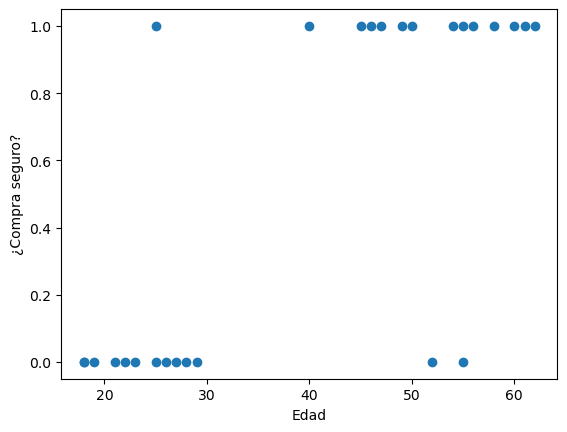

In [4]:
# Desplegar df en un gráfico
plt.scatter(df['edad'], df['compra'])
plt.xlabel('Edad')
plt.ylabel('¿Compra seguro?')
plt.show()

Para realizar la regresión logística, hay que separar los datos en dos grupos:

- Datos para entrenamiento
- Datos para prueba

Para cada una, se deben utilizar 2 variables (4 en total), según eje. Sin embargo, es necesario también asegurarse de que cada registro aparezca en alguna de esas variables, ya sea de entrenamiento o de prueba, sin repetirse y sin dejar ningún registro afuera. Todos los registros deben estar en alguna de estas variables. La función `train_test_split()` nos ayuda a simplificar el proceso.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['edad']], df['compra'], train_size=0.9
)

In [9]:
# Ver X_train
X_train

,edad
8,62
20,21
16,25
1,25
3,52
25,54
19,18
14,49
4,46
22,40


In [10]:
# Ver X_test
X_test

,edad
0,22
12,27
24,50


Como se puede ver, la distribución de datos incluye tanto los valores como sus respectivos índices. La asimetría de tamaño entre `X_train` y `X_size` responde al valor indicado en el parámetro `train_size` de la función `train_test_split()` (en este caso, incluyendo el 0.9 o el 90% de los datos en el grupo de entrenamiento).

In [11]:
# Crear el objeto del modelo
model: LogisticRegression = LogisticRegression()

In [12]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Evaluar el desempeño del modelo con los datos de prueba
model.score(X_test, y_test)

1.0

El modelo tiene un 100% de probabilidades de acertar cuando le hagamos una consulta.

La función `score()` entrega una forma de medir el rendimiento del modelo entrenado. Definir si un puntaje obtenido es bueno o no, depende del algoritmo específico y del problema que se esté resolviendo. Como regla general, un puntaje de 0.8 (80%) en adelante podría considerarse confiable en la mayoría de los casos (aunque en algunas áreas específicas podría considerarse un valor insuficiente).

In [16]:
# Testear con nuevos datos
new_data: pd.DataFrame = pd.DataFrame({
    'edad': [25, 35, 45, 55]
})
probability: np.ndarray = model.predict_proba(new_data)
probability

array([[0.84284852, 0.15715148],
       [0.60765655, 0.39234345],
       [0.30903544, 0.69096456],
       [0.11438246, 0.88561754]])

In [18]:
buying_probability: np.ndarray = model.predict_proba(new_data)[:, 1]
buying_probability

array([0.15715148, 0.39234345, 0.69096456, 0.88561754])

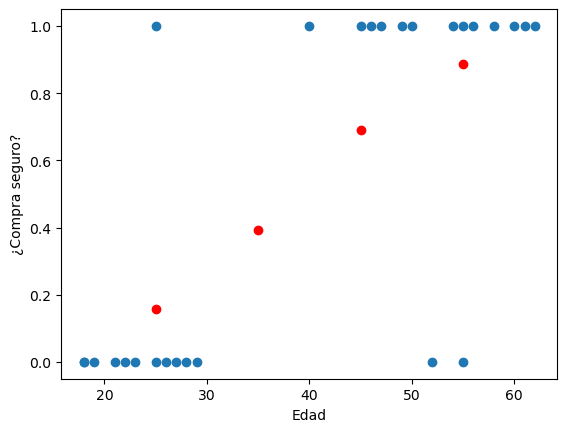

In [19]:
# Graficar probabilidad junto al gráfico anterior
plt.scatter(df['edad'], df['compra'])
plt.scatter(new_data['edad'], buying_probability, color='red')
plt.xlabel('Edad')
plt.ylabel('¿Compra seguro?')
plt.show()

### Notas adicionales

Establecer un `random_state` en la función `train_test_split()` proporciona un punto de control para que los resultados sean reproducibles, asegurando que las mismas filas de datos se seleccionen para el entrenamiento y las pruebas cada vez que se ejecute el código.

Por otro lado, la visualización conjunta permite comparar la efectividad y coherencia de las predicciones del modelo respecto a las tendencias observadas en los datos originales, mostrando cómo se comporta el modelo bajo nuevas circunstancias.